<a href="https://colab.research.google.com/github/goncaloneto13/Face-Recognition-using-VGGFace2-and-Linear-SVM-FG-NET-/blob/main/Face_Recognition_using_VGGFace2_and_Linear_SVM_(FG_NET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import math

%tensorflow_version 1.x
#!pip install tensorflow-gpu==1.15
#!pip intall tensorflow
import tensorflow as tf
import numpy  as  np
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import Model
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
!pip install keras_vggface
!pip install keras_applications
!pip install keras_preprocessing
from keras_vggface.vggface import VGGFace
from sklearn.neighbors import KNeighborsClassifier
from skimage.exposure import equalize_hist
from scipy.spatial.distance import cosine
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras_vggface import utils
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import io
from PIL import Image, ImageOps
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.model_selection import LeaveOneOut
pasta = 'drive/My Drive/FGNE'

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Corte do VGG-Faces na primeira camada densa com uma saida de 4096 caracteristicas

In [ ]:
vgg_face = VGGFace(model='senet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
#ext_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
#ext_model = Model(inputs=vgg_face.input, outputs=vgg_face.get_layer('fc6').output)
ext_model = Model(inputs=vgg_face.input, outputs=vgg_face.output)
#ext_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


104947712/104944616 [==============================] - 7s 0us/step


In [ ]:
from keras_vggface.utils import decode_predictions
pasta = 'drive/My Drive/FGNE'

def retirar_descritores( path ):
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
    descritores = []
    IDs = []
    nomes = []

    for imagePath in imagePaths:
      
        img = image.load_img(imagePath,target_size=(224,224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = utils.preprocess_input(img, version=2)
        descritor = ext_model.predict(img,verbose=0)
     #   results = decode_predictions(descritor)
     #   for result in results[0]:
	   #     print('%s: %.3f%%' % (result[0], result[1]*100))
                                     
  
        descritores.append(descritor)
        #print(imagePath[20:23])
        ID = imagePath[20:23]
        IDs.append(ID)
        nomes.append(imagePath[20:26])
        print('.', end ='')

    return IDs, descritores, nomes
    
IDs, descritores,nomes = retirar_descritores(pasta)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from random import choice
from numpy import expand_dims

x = []

for i in range(len(descritores)):
  x.append(descritores[i].reshape(2048))

x = np.array(x)
y = np.array(IDs)

print(x.shape)  
#clf = KNeighborsClassifier(n_neighbors = 1)
pca = PCA()
#clf = LDA()
#clf = LinearSVC(dual = False, predict_proba = True)

clf = SVC(kernel='linear', probability=True)


loo = LeaveOneOut()
loo.get_n_splits(x)
print(len(x))
s=0
for train_index, test_index in loo.split(x):
   # print("TEST:", test_index)

    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(x_train, y_train)
    #print(test_index[0])

    des_train = clf.predict(x_train)
    des_test = clf.predict(x_test)

    scr_train = accuracy_score(y_train, des_train)
    scr_test = accuracy_score(y_test, des_test)

    #print('Accuracy: train=%.3f, test=%.3f' % (scr_train*100, scr_test*100),end = ' -- ')

    rsl = clf.score(x_test,y_test)
    
    #print(rsl)
    s += rsl

    
    classes = clf.classes_
    proba = clf.predict_proba(x_test)
    probas= []
    for i in range(len(classes)):
       probas.append((classes[i], int(proba[0][i] * 100)))

    probas = sorted(probas, key=lambda j: j[1],reverse=True)

    print(nomes[test_index[0]], clf.predict(x_test), end = ' -- ')
    print(probas[0][1], probas[1][1], end = ' - ')

    if rsl == 0:
         
        print( 'erro ' + probas[1][0], end = '') 

    print('')
print(s/len(x))
    



(1002, 2048)
1002
001A10 ['001'] -- 22 2 - 
001A14 ['001'] -- 10 3 - 
001A05 ['001'] -- 4 4 - 
001A18 ['001'] -- 16 5 - 
001A16 ['001'] -- 34 3 - 
001A19 ['001'] -- 9 3 - 
001A22 ['001'] -- 27 3 - 
001A28 ['001'] -- 24 4 - 
001A29 ['001'] -- 27 4 - 
001A40 ['001'] -- 30 4 - 
001A33 ['001'] -- 15 3 - 
001A43 ['001'] -- 20 4 - 
002A03 ['056'] -- 6 5 - erro 002
001A43 ['001'] -- 11 4 - 
002A12 ['002'] -- 25 2 - 
002A05 ['002'] -- 27 5 - 
002A04 ['002'] -- 5 5 - 
002A07 ['002'] -- 47 5 - 
002A15 ['002'] -- 16 4 - 
002A20 ['002'] -- 20 4 - 
002A16 ['002'] -- 34 2 - 
002A21 ['002'] -- 30 3 - 
002A18 ['002'] -- 17 3 - 
002A23 ['002'] -- 7 3 - 
002A26 ['002'] -- 14 4 - 
002A29 ['002'] -- 14 5 - 
002A31 ['002'] -- 26 4 - 
002A36 ['002'] -- 22 4 - 
002A38 ['002'] -- 24 3 - 
003A23 ['003'] -- 11 3 - 
003A20 ['003'] -- 17 3 - 
003A38 ['003'] -- 7 5 - 
003A18 ['003'] -- 10 5 - 
003A49 ['003'] -- 20 4 - 
003A25 ['003'] -- 13 5 - 
003A51 ['003'] -- 20 4 - 
003A35 ['003'] -- 24 4 - 
003A47 ['003'] -- 

In [ ]:
tamanho_descritor = len(descritores[0])
tamanho_vetor_descritor = len(descritores)

n = 0;
acertos = 0;
x_treino = []
y_treino = []
distancias = []
erros = []

#knn = KNeighborsClassifier(n_neighbors = 1)
#pca = PCA()
#lda = LDA()
clf = LinearSVC(max_iter=16,dual = False)

for i in range(tamanho_vetor_descritor):
    # distancia do cosseno
    '''
    for j in range(tamanho_vetor_descritor):
        if i != j:
            distancia = cosine(descritores[j], descritores[i])
            distancias.append((IDs[j], distancia, nomes[j]))
    distOrd = sorted(distancias, key = lambda x: x[1])
    classe = distOrd[0][0]
    distancias = []
    '''
    
    #Usando LDA
    '''
    for j in range(tamanho_vetor_descritor):
        if i != j:
            x_treino.append(descritores[j][0])
            y_classes.append(IDs[j])
    lda.fit(x_treino,y_classes)
    classe = lda.predict(descritores[i].reshape(1, -1)) 
    x_treino = []
    y_classes = []
    '''
     #Usando SVM

    for j in range(tamanho_vetor_descritor):
        if i != j :
            x_treino.append(descritores[j][0])
            x_treino.append(descritores_mirror[j][0])
            y_treino.append(IDs[j])
            y_treino.append(IDs_mirror[j])               
    clf.fit(x_treino, y_treino)
    classe = clf.predict(descritores[i].reshape(1, -1))
    x_treino = []
    y_treino = []
    
    # Usando PCA
    '''
    for j in range(tamanho_vetor_descritor):
        if i != j:
            x_treino.append(descritores[j]) 
    descritores_pca = pca.fit_transform(x_treino)
    descritor_teste_pca  = pca.transform(descritores[i].reshape(1, -1))
    for l in range(tamanho_vetor_descritor - 1):
        distancia = cosine(descritor_teste_pca, descritores_pca[l])
        distancias.append((IDs[l], distancia, nomes[l]))
    distOrd = sorted(distancias, key = lambda x: x[1])
    classe = distOrd[0][0]
    distancias = []  
    x_treino = []
    
    '''
    # KNN
    '''
    for j in range(tamanho_vetor_descritor):
      if i != j:
         
          x_treino.append(descritores[j][0])
          y_classes.append(IDs[j])
    knn.fit(x_treino, y_classes) 
    classe = knn.predict(descritores[i].reshape(1,-1))
    x_treino = []
    y_classes = []     
    '''
    #LDA com cosseno
    ''' 
    for j in range(tamanho_vetor_descritor):
      if i != j:
          x_treino.append(descritores[j])
          y_classes.append(IDs[j])
    descritores_lda = lda.fit_transform(x_treino,y_classes)
    descritor_teste_lda = lda.transform(descritores[i].reshape(1,-1))
    for l in range(tamanho_vetor_descritor - 1):
        distancia = cosine(descritor_teste_lda, descritores_lda[l])
        distancias.append((IDs[l], distancia, nomes[l]))
    distOrd = sorted(distancias, key = lambda x: x[1])
    classe = distOrd[0][0]
    distancias = []  
    x_treino = [] 
    y_classes = []
    '''

    #for c in range(3):
    #    print(distOrd[c][2], end = '   ')
    #classe = distOrd[0][0]
      
    print("\n" + nomes[i] + "\nClasse da face:          " + str(IDs[i]) + "\nFace classificada como :  "+ str(int(classe)))
    if int(IDs[i]) == int(classe):
        acertos += 1;
    else:
        print("\n" + str(i)+'  ' + nomes[i][4:6], end=' -- ')
        print('-----------------------------------------------errou')
      #  for c in range(3):
      #      print(distOrd[c][2], end = '   ')

        erros.append(nomes[i][4:6])
    
        #print("\nClasse da face:          " + str(IDs[i]) + "\nFace classificada como:  "+ str(int(classe)))
    n += 1;
    #print(str(acertos) + " de " + str(n) +"      " + str(round(acertos/n*100,1)) + "%" )

print() 
print(str(acertos) + " de " + str(n))
print(acertos / n)

idades = []
rep = []
for i in erros:
  if i not in idades:
    idades.append(i)
idades = sorted(idades)

for i in idades:
  rep.append(erros.count(i))

print(idades)
print(rep)

plt.bar(idades,rep)

.2048


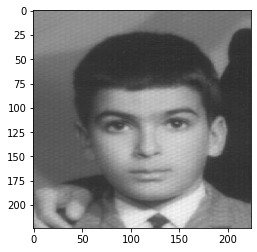

In [ ]:
img = image.load_img(pasta + '/' + os.listdir(pasta)[0],target_size=(224,224)) #carrega a imagem 
img_flip = ImageOps.mirror(img)
plt.imshow(img_flip)
x_train = image.img_to_array(img)#transforma em array
x_train = np.expand_dims(x_train, axis=0)
x_train = utils.preprocess_input(x_train, version=2) #pré-processamento pra ser usado no VGGFace2.
print('.', end ='')
descritor = ext_model.predict(x_train,verbose=0)#retira o descritor 


print(len(descritor[0]))


In [ ]:
img = image.load_img(pasta + '/' + os.listdir(pasta)[0],target_size=(224,224))
#img = tf.image.adjust_gamma(img, 0.2)
#img = cv2.bilateralFilter(img,9,40,40)
#plt.imshow(img)
x_train = image.img_to_array(img)
x_train = np.expand_dims(x_train, axis=0)
x_train = utils.preprocess_input(x_train, version=2)
print('.', end ='')
descritor = ext_model.predict(x_train,verbose=0)
print(descritor.shape)
tamanho_descritor = descritor.shape[1]
print(np.reshape(descritor, (tamanho_descritor,)))
print(descritor.shape[1])




.(1, 8631)
[5.0540198e-08 2.6559613e-08 3.3975443e-08 ... 5.1557958e-08 1.0187240e-08
 7.4850979e-09]
8631


Extrai os descritores de cada imagem e salva no vetor descritores.

In [ ]:
def retirar_descritores_mirror( path ):
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
    descritores_mirror = []
    IDs = []
    nomes = []

    for imagePath in imagePaths:         
        img = image.load_img(imagePath,target_size=(224,224))
        img_mirror = ImageOps.mirror(img)
        img_mirror = image.img_to_array(img_mirror)
        img_mirror = np.expand_dims(img_mirror, axis=0)
        img_mirror = utils.preprocess_input(img_mirror, version=2)
        descritor_mirror = ext_model.predict(img_mirror,verbose=0)
        descritores_mirror.append(descritor_mirror) 

        ID = imagePath[20:23]
        IDs.append(ID)
        nomes.append(imagePath[20:26] + '_mirror')
        print('.', end ='')

    return IDs, descritores_mirror, nomes
    
IDs_mirror, descritores_mirror,nomes_mirror = retirar_descritores_mirror(pasta)

Redução de dimensionalidade usando LDA

Classificação usando a distancia do cosseno




In [ ]:
idades = []
rep = []
for i in erros:
  if i not in idades:
    idades.append(i)
idades = sorted(idades)

for i in idades:
  rep.append(erros.count(i))

print(idades)
print(rep)

plt.bar(idades,rep)


901 de 1002 ( 89.9 % ) com LinearSVM max_int= 10

897 de 1002 ( 89.5 % ) com LinearSVM

883 de 1002 ( 88.1 ) com LDA

874 de 1002 ( 87.2 % ) Redução com LDA e LinearSVM

855 de 1002 ( 85% ) só com a distancia do cosseno

846 de 1002 ( 84.4% ) com KNN k = 1

825 de 1002 ( 82.3 % ) LDA com distancia do cosseno

790 de 1002 ( 78.8 % ) com PCA e distancia do cosseno 


84 de 101

182 de 250
0.728










Vgg-Face 2 com senet50 e imagens coloridas e com pca e distancia do cosseno -- 0.8810 822 de 933

Vgg-Face 2 com senet50 e imagens coloridas e sem pca e distancia do cosseno -- 0.8778

Vgg-Face 2 com senet50 e imagens em escala de cinza e sem pca e distancia do cosseno -- 0.8745

Vgg-Face 2 com senet50 e imagens em escala de cinza e sem pca e KNN com k = 1 -- 0.8745

Vgg-Face 2 com senet50 e imagens coloridas e sem pca e distancia do cosseno e sem corte de face -- 0.8557 866 de 1012 

Vgg-Face 2 com senet50 e imagens coloridas e com pca e distancia do cosseno e sem corte de face -- 0.8537 864 de 1012 

(933, 200)
823 de 933
0.8821007502679529

(933, 300)
824 de 933
0.8831725616291533

com PCA 0.8704 n = 625


In [ ]:
path = 'drive/My Drive/FGNE'
clf = LinearSVC(max_iter=16,dual = False)
ac=0
imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
i = 0
for imagePath in imagePaths[0:101]:
  img = image.load_img(imagePath,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = utils.preprocess_input(img, version=2)
  descritor = ext_model.predict(img,verbose=0)
  #print(len(descritores))
  del(descritores[i])
  del(IDs[i])

  x_treino = np.array(descritores)
  x_treino = x_treino.reshape(x_treino.shape[0],x_treino.shape[2])
  #print(x_treino.shape)
  clf.fit(x_treino,IDs)
  #print(imagePath)
  classe = clf.predict(descritor)
  print(imagePath[20:23] , '  ',classe)
  
  descritores.insert(i,descritor)
  IDs.insert(i,imagePath[20:23])
  i +=2

  if imagePath[20:23] == classe:
    ac += 1
    print('ac')

print(ac/100)    
  
    





(1002, 2048)
1002
001A10 ['001'] -- 22 2 - 
001A14 ['001'] -- 10 3 - 
001A05 ['001'] -- 4 4 - 
001A18 ['001'] -- 16 5 - 
001A16 ['001'] -- 34 3 - 
001A19 ['001'] -- 9 3 - 
001A22 ['001'] -- 27 3 - 
001A28 ['001'] -- 24 4 - 
001A29 ['001'] -- 27 4 - 
001A40 ['001'] -- 30 4 - 
001A33 ['001'] -- 15 3 - 
001A43 ['001'] -- 20 4 - 
002A03 ['056'] -- 6 5 - erro 002
001A43 ['001'] -- 11 4 - 
002A12 ['002'] -- 25 2 - 
002A05 ['002'] -- 27 5 - 
002A04 ['002'] -- 5 5 - 
002A07 ['002'] -- 47 5 - 
002A15 ['002'] -- 16 4 - 
002A20 ['002'] -- 20 4 - 
002A16 ['002'] -- 34 2 - 
002A21 ['002'] -- 30 3 - 
002A18 ['002'] -- 17 3 - 
002A23 ['002'] -- 7 3 - 
002A26 ['002'] -- 14 4 - 
002A29 ['002'] -- 14 5 - 
002A31 ['002'] -- 26 4 - 
002A36 ['002'] -- 22 4 - 
002A38 ['002'] -- 24 3 - 
003A23 ['003'] -- 11 3 - 
003A20 ['003'] -- 17 3 - 
003A38 ['003'] -- 7 5 - 
003A18 ['003'] -- 10 5 - 
003A49 ['003'] -- 20 4 - 
003A25 ['003'] -- 13 5 - 
003A51 ['003'] -- 20 4 - 
003A35 ['003'] -- 24 4 - 
003A47 ['003'] -- 23 3 - 
003A58 ['003'] -- 10 5 - 
004A37 ['004'] -- 13 3 - 
004A28 ['004'] -- 9 5 - 
004A26 ['004'] -- 13 3 - 
004A40 ['004'] -- 20 4 - 
004A30 ['004'] -- 18 5 - 
003A60 ['003'] -- 17 3 - 
003A61 ['003'] -- 10 4 - 
004A19 ['004'] -- 15 4 - 
004A21 ['004'] -- 6 5 - 
004A48 ['004'] -- 13 4 - 
004A53 ['004'] -- 22 4 - 
004A62 ['004'] -- 16 4 - 
004A51 ['004'] -- 18 4 - 
005A18 ['005'] -- 18 4 - 
005A31 ['005'] -- 23 3 - 
005A24 ['005'] -- 13 5 - 
005A30 ['005'] -- 8 7 - 
005A35 ['005'] -- 20 4 - 
004A63 ['004'] -- 13 5 - 
005A40 ['005'] -- 17 6 - 
005A48 ['005'] -- 12 5 - 
005A45 ['005'] -- 21 3 - 
006A31 ['006'] -- 27 5 - 
005A49 ['005'] -- 21 7 - 
006A28 ['006'] -- 19 6 - 
006A24 ['006'] -- 16 5 - 
005A52 ['005'] -- 11 6 - 
006A36 ['006'] -- 9 6 - 
005A61 ['005'] -- 6 5 - 
006A40 ['006'] -- 20 8 - 
006A51 ['006'] -- 22 5 - 
006A42 ['006'] -- 27 5 - 
006A46 ['006'] -- 25 6 - 
006A55 ['006'] -- 21 7 - 
006A67 ['006'] -- 20 5 - 
007A01 ['016'] -- 8 5 - erro 050
006A61 ['006'] -- 31 4 - 
007A18 ['007'] -- 16 5 - 
006A69 ['006'] -- 8 6 - 
007A22 ['007'] -- 7 4 - 
007A23 ['007'] -- 17 3 - 
007A26 ['007'] -- 14 5 - 
008A06 ['008'] -- 18 4 - 
007A37 ['007'] -- 17 4 - 
007A45 ['007'] -- 7 6 - 
008A03 ['009'] -- 10 6 - erro 001
007A39 ['007'] -- 17 5 - 
008A08 ['008'] -- 8 4 - 
007A38 ['007'] -- 12 4 - 
008A12 ['008'] -- 29 4 - 
008A16 ['008'] -- 17 5 - 
008A13 ['008'] -- 25 5 - 
008A17 ['008'] -- 13 5 - 
008A18 ['008'] -- 20 4 - 
008A21 ['008'] -- 22 4 - 
008A31 ['008'] -- 32 2 - 
008A29 ['008'] -- 28 4 - 
008A33 ['008'] -- 20 3 - 
008A30 ['008'] -- 17 4 - 
008A35 ['008'] -- 32 4 - 
008A41 ['008'] -- 22 3 - 
009A00 ['009'] -- 6 4 - 
009A01 ['009'] -- 12 4 - 
009A03 ['009'] -- 10 3 - 
009A11 ['009'] -- 26 7 - 
009A09 ['009'] -- 22 4 - 
009A05 ['031'] -- 3 3 - erro 054
009A14 ['009'] -- 9 3 - 
009A13 ['009'] -- 7 5 - 
009A16 ['009'] -- 24 3 - 
009A22 ['009'] -- 15 4 - 
009A16 ['009'] -- 19 3 - 
009A22 ['009'] -- 29 3 - 
009A18 ['009'] -- 18 4 - 
010A04 ['010'] -- 21 3 - 
010A01 ['036'] -- 5 4 - erro 015
010A06 ['010'] -- 15 3 - 
010A07 ['010'] -- 16 5 - 
010A05 ['010'] -- 16 3 - 
010A07 ['010'] -- 17 3 - 
010A09 ['010'] -- 10 4 - 
010A10 ['010'] -- 4 4 - 
010A18 ['010'] -- 16 4 - 
011A05 ['011'] -- 10 4 - 
011A07 ['011'] -- 7 2 - 
010A16 ['010'] -- 12 3 - 
011A02 ['043'] -- 5 3 - erro 011
010A12 ['010'] -- 18 3 - 
010A15 ['010'] -- 12 3 - 
011A11 ['011'] -- 18 7 - 
011A14 ['011'] -- 20 4 - 
011A13 ['011'] -- 19 3 - 
011A27 ['011'] -- 25 7 - 
011A17 ['011'] -- 15 6 - 
011A20 ['011'] -- 10 4 - 
011A15 ['011'] -- 10 8 - 
011A40 ['011'] -- 25 6 - 
011A30 ['011'] -- 34 5 - 
011A34 ['011'] -- 15 7 - 
011A42 ['011'] -- 15 12 - 
012A04 ['024'] -- 5 3 - erro 009
012A07 ['012'] -- 4 4 - 
012A12 ['012'] -- 26 5 - 
012A18 ['012'] -- 30 6 - 
012A24 ['012'] -- 24 3 - 
012A14 ['012'] -- 18 4 - 
012A21 ['012'] -- 44 2 - 
012A23 ['012'] -- 10 3 - 
012A25 ['012'] -- 22 4 - 
012A26 ['012'] -- 21 3 - 
012A27 ['012'] -- 25 3 - 
012A32 ['012'] -- 25 3 - 
013A00 ['077'] -- 7 5 - erro 043
012A34 ['012'] -- 18 5 - 
013A18 ['013'] -- 24 3 - 
013A16 ['013'] -- 22 5 - 
013A08 ['069'] -- 7 6 - erro 015
012A36 ['012'] -- 19 2 - 
012A30 ['012'] -- 23 3 - 
013A21 ['013'] -- 7 7 - 
013A19 ['013'] -- 14 6 - 
013A30 ['013'] -- 17 4 - 
013A25 ['013'] -- 28 4 - 
013A44 ['013'] -- 11 4 - 
013A34 ['013'] -- 23 3 - 
013A23 ['013'] -- 20 4 - 
014A03 ['038'] -- 7 4 - erro 048
014A12 ['014'] -- 11 8 - 
013A41 ['013'] -- 13 4 - 
014A16 ['014'] -- 12 4 - 
014A18 ['014'] -- 19 4 - 
014A14 ['014'] -- 7 5 - 
014A22 ['014'] -- 19 5 - 
014A42 ['014'] -- 18 6 - 
014A40 ['014'] -- 25 4 - 
014A36 ['014'] -- 12 6 - 
015A01 ['036'] -- 5 4 - erro 036
014A30 ['014'] -- 11 5 - 
015A00 ['077'] -- 7 7 - erro 077
015A03 ['015'] -- 7 6 - 
015A09 ['015'] -- 10 4 - 
015A07 ['015'] -- 16 4 - 
015A04 ['015'] -- 10 4 - 
015A17 ['015'] -- 12 3 - 
015A10 ['015'] -- 8 3 - 
015A15 ['015'] -- 16 3 - 
015A14 ['015'] -- 15 5 - 
015A05 ['015'] -- 19 4 - 
015A12 ['015'] -- 34 3 - 
015A19 ['015'] -- 11 4 - 
016A04 ['077'] -- 5 4 - erro 016
016A03 ['016'] -- 5 5 - 
016A05 ['016'] -- 20 3 - 
016A08 ['016'] -- 29 4 - 
016A07 ['016'] -- 15 3 - 
016A14 ['016'] -- 13 3 - 
016A10 ['016'] -- 25 7 - 
016A12 ['016'] -- 16 5 - 
016A01 ['016'] -- 5 4 - 
017A12 ['020'] -- 8 7 - erro 020
016A16 ['016'] -- 13 3 - 
016A17 ['016'] -- 26 4 - 
016A18 ['016'] -- 28 5 - 
017A07 ['017'] -- 5 4 - 
017A15 ['017'] -- 20 3 - 
017A05 ['042'] -- 7 5 - erro 023
016A19 ['016'] -- 7 4 - 
017A19 ['017'] -- 6 3 - 
017A17 ['017'] -- 14 3 - 
017A22 ['017'] -- 15 5 - 
017A26 ['017'] -- 17 5 - 
017A29 ['017'] -- 37 2 - 
017A38 ['017'] -- 26 3 - 
017A36 ['017'] -- 23 4 - 
017A32 ['017'] -- 16 6 - 
018A06 ['023'] -- 5 5 - erro 023
017A42 ['017'] -- 9 4 - 
018A11 ['065'] -- 3 3 - erro 035
018A16 ['018'] -- 11 5 - 
018A18 ['018'] -- 10 8 - 
018A28 ['018'] -- 13 4 - 
018A22 ['018'] -- 35 3 - 
018A25 ['018'] -- 15 4 - 
018A36 ['018'] -- 25 3 - 
019A00 ['010'] -- 5 4 - erro 010
018A34 ['018'] -- 20 3 - 
018A33 ['018'] -- 9 4 - 
018A29 ['018'] -- 24 3 - 
019A03 ['019'] -- 10 5 - 
019A05 ['019'] -- 6 5 - 
019A07 ['019'] -- 25 5 - 
020A02 ['038'] -- 8 5 - erro 064
020A04 ['020'] -- 9 5 - 
019A18 ['019'] -- 16 5 - 
019A27 ['019'] -- 18 5 - 
019A15 ['019'] -- 11 4 - 
019A12 ['019'] -- 23 4 - 
019A30 ['019'] -- 13 5 - 
019A23 ['019'] -- 14 3 - 
020A08 ['020'] -- 8 4 - 
020A11 ['020'] -- 10 4 - 
020A13 ['020'] -- 23 4 - 
020A16 ['020'] -- 9 4 - 
020A24 ['020'] -- 23 4 - 
020A22 ['020'] -- 21 4 - 
020A18 ['020'] -- 9 4 - 
020A30 ['020'] -- 21 4 - 
020A20 ['020'] -- 19 4 - 
020A26 ['020'] -- 20 6 - 
020A36 ['020'] -- 14 5 - 
021A03 ['021'] -- 4 4 - 
021A05 ['039'] -- 7 5 - erro 039
021A23 ['021'] -- 15 7 - 
021A27 ['021'] -- 18 4 - 
021A18 ['021'] -- 15 5 - 
021A06 ['021'] -- 13 3 - 
021A16 ['021'] -- 21 4 - 
021A20 ['021'] -- 15 5 - 
021A11 ['021'] -- 16 3 - 
022A00 ['036'] -- 4 3 - erro 010
021A39 ['021'] -- 28 3 - 
021A35 ['021'] -- 13 4 - 
021A30 ['021'] -- 22 3 - 
022A07 ['033'] -- 5 3 - erro 043
022A14 ['022'] -- 15 4 - 
022A16 ['022'] -- 16 5 - 
022A18 ['022'] -- 16 3 - 
022A11 ['022'] -- 6 5 - 
022A20 ['022'] -- 22 6 - 
022A23 ['022'] -- 21 4 - 
022A26 ['022'] -- 23 2 - 
022A25 ['022'] -- 28 4 - 
023A03 ['020'] -- 7 4 - erro 018
022A28 ['022'] -- 20 4 - 
023A05 ['023'] -- 28 3 - 
023A07 ['023'] -- 7 6 - 
023A00 ['036'] -- 9 5 - erro 042
022A27 ['022'] -- 19 4 - 
022A30 ['022'] -- 15 5 - 
023A09 ['023'] -- 11 4 - 
023A14 ['023'] -- 31 4 - 
023A16 ['023'] -- 21 3 - 
024A05 ['023'] -- 5 5 - erro 023
023A21 ['023'] -- 12 7 - 
023A18 ['024'] -- 6 6 - erro 024
023A25 ['023'] -- 17 3 - 
023A29 ['023'] -- 12 4 - 
023A22 ['023'] -- 17 3 - 
024A00 ['025'] -- 4 4 - erro 043
024A07 ['024'] -- 15 12 - 
024A10 ['024'] -- 10 4 - 
024A17 ['024'] -- 27 4 - 
024A28 ['024'] -- 25 4 - 
024A23 ['024'] -- 18 4 - 
024A25 ['024'] -- 17 6 - 
024A19 ['024'] -- 11 7 - 
025A00 ['022'] -- 6 5 - erro 071
024A30 ['024'] -- 15 5 - 
024A18 ['024'] -- 21 7 - 
025A03 ['049'] -- 5 5 - erro 049
025A12 ['025'] -- 9 4 - 
025A07 ['025'] -- 7 5 - 
025A15 ['025'] -- 16 3 - 
025A34 ['025'] -- 8 5 - 
025A22 ['025'] -- 26 3 - 
025A28 ['025'] -- 15 3 - 
025A23 ['025'] -- 7 3 - 
025A19 ['025'] -- 14 3 - 
025A18 ['025'] -- 18 4 - 
025A39 ['025'] -- 13 6 - 
026A13 ['026'] -- 17 5 - 
026A02 ['026'] -- 10 4 - 
026A11 ['026'] -- 13 7 - 
026A07 ['026'] -- 21 4 - 
026A15 ['026'] -- 20 4 - 
026A04 ['026'] -- 5 3 - 
026A06 ['026'] -- 17 4 - 
026A17 ['026'] -- 9 4 - 
026A00 ['076'] -- 5 4 - erro 042
026A19 ['026'] -- 11 3 - 
026A18 ['026'] -- 28 4 - 
027A02 ['063'] -- 10 6 - erro 063
027A20 ['027'] -- 16 4 - 
027A25 ['027'] -- 13 5 - 
027A11 ['027'] -- 16 4 - 
027A22 ['027'] -- 12 4 - 
027A16 ['027'] -- 18 4 - 
027A18 ['027'] -- 16 5 - 
027A13 ['027'] -- 18 4 - 
027A30 ['027'] -- 21 4 - 
028A34 ['028'] -- 18 5 - 
028A26 ['028'] -- 24 3 - 
028A18 ['028'] -- 13 4 - 
027A36 ['027'] -- 15 4 - 
028A20 ['028'] -- 5 3 - 
027A41 ['027'] -- 14 5 - 
028A14 ['028'] -- 12 5 - 
028A16 ['028'] -- 22 3 - 
028A28 ['028'] -- 10 4 - 
028A35 ['028'] -- 11 5 - 
028A37 ['028'] -- 16 4 - 
028A41 ['028'] -- 16 4 - 
029A10 ['029'] -- 8 3 - 
029A13 ['029'] -- 30 3 - 
029A05 ['029'] -- 15 5 - 
029A04 ['029'] -- 8 5 - 
029A01 ['023'] -- 7 5 - erro 024
029A11 ['029'] -- 13 3 - 
028A46 ['028'] -- 11 4 - 
029A16 ['029'] -- 7 6 - 
029A20 ['029'] -- 22 3 - 
029A22 ['029'] -- 17 4 - 
029A29 ['029'] -- 20 5 - 
029A31 ['029'] -- 21 3 - 
030A04 ['030'] -- 16 5 - 
030A05 ['030'] -- 17 3 - 
029A33 ['029'] -- 23 3 - 
030A00 ['030'] -- 8 7 - 
029A23 ['029'] -- 17 5 - 
030A07 ['030'] -- 16 4 - 
030A16 ['030'] -- 20 4 - 
030A10 ['030'] -- 14 5 - 
030A26 ['030'] -- 5 4 - 
030A18 ['030'] -- 22 3 - 
030A20 ['030'] -- 17 4 - 
030A23 ['030'] -- 25 3 - 
030A17 ['030'] -- 8 4 - 
031A00 ['031'] -- 6 6 - 
031A02 ['031'] -- 6 5 - 
031A03 ['031'] -- 22 6 - 
031A06 ['031'] -- 7 4 - 
031A04 ['031'] -- 18 4 - 
031A11 ['031'] -- 48 2 - 
031A16 ['031'] -- 15 3 - 
031A09 ['031'] -- 7 6 - 
031A14 ['031'] -- 17 3 - 
031A12 ['031'] -- 41 2 - 
031A07 ['031'] -- 16 4 - 
031A15 ['031'] -- 35 2 - 
031A19 ['031'] -- 10 5 - 
032A08 ['032'] -- 9 3 - 
032A06 ['060'] -- 6 6 - erro 060
032A24 ['032'] -- 13 7 - 
032A10 ['032'] -- 10 4 - 
032A18 ['032'] -- 21 4 - 
032A28 ['032'] -- 18 4 - 
032A20 ['032'] -- 17 5 - 
032A15 ['032'] -- 9 4 - 
032A13 ['032'] -- 23 2 - 
032A33 ['032'] -- 11 7 - 
033A02 ['070'] -- 5 3 - erro 037
032A35 ['032'] -- 31 3 - 
033A18 ['033'] -- 23 3 - 
033A21 ['033'] -- 11 3 - 
033A14 ['033'] -- 7 4 - 
033A25 ['033'] -- 7 4 - 
033A10 ['033'] -- 10 7 - 
032A40 ['032'] -- 28 3 - 
033A05 ['064'] -- 7 7 - erro 058
033A30 ['033'] -- 9 3 - 
033A39 ['033'] -- 20 3 - 
033A35 ['033'] -- 25 2 - 
034A13 ['034'] -- 26 4 - 
034A11 ['034'] -- 5 4 - 
034A15 ['034'] -- 25 4 - 
034A02 ['038'] -- 9 5 - erro 058
034A04 ['034'] -- 5 5 - 
033A44 ['033'] -- 24 2 - 
034A16 ['034'] -- 25 4 - 
034A18 ['034'] -- 17 3 - 
034A21 ['034'] -- 18 5 - 
034A25 ['034'] -- 27 2 - 
034A30 ['034'] -- 13 3 - 
034A44 ['034'] -- 23 3 - 
035A01 ['050'] -- 8 5 - erro 050
035A03 ['035'] -- 9 9 - 
034A35 ['034'] -- 10 7 - 
035A00 ['050'] -- 3 3 - erro 078
034A39 ['034'] -- 9 4 - 
035A05 ['035'] -- 13 5 - 
035A07 ['035'] -- 22 3 - 
035A08 ['035'] -- 30 3 - 
035A21 ['035'] -- 26 4 - 
035A12 ['035'] -- 11 5 - 
035A14 ['035'] -- 20 4 - 
035A18 ['035'] -- 8 5 - 
035A09 ['035'] -- 5 4 - 
035A16 ['035'] -- 17 5 - 
035A23 ['035'] -- 15 4 - 
035A23 ['035'] -- 24 4 - 
036A01 ['036'] -- 5 4 - 
036A00 ['036'] -- 13 5 - 
036A05 ['036'] -- 22 4 - 
036A15 ['036'] -- 6 4 - 
036A13 ['036'] -- 15 3 - 
036A11 ['036'] -- 12 4 - 
036A08 ['036'] -- 13 8 - 
036A06 ['036'] -- 7 6 - 
036A03 ['036'] -- 16 4 - 
036A17 ['036'] -- 15 4 - 
036A18 ['036'] -- 9 3 - 
037A04 ['037'] -- 18 3 - 
037A01 ['037'] -- 5 4 - 
037A08 ['037'] -- 23 3 - 
037A00 ['037'] -- 7 7 - 
036A19 ['036'] -- 20 3 - 
037A02 ['037'] -- 17 3 - 
036A20 ['036'] -- 10 5 - 
037A06 ['037'] -- 12 6 - 
037A11 ['037'] -- 10 4 - 
037A13 ['037'] -- 9 3 - 
037A09 ['037'] -- 7 3 - 
038A00 ['076'] -- 4 3 - erro 034
037A17 ['037'] -- 15 5 - 
037A19 ['037'] -- 9 7 - 
037A18 ['037'] -- 11 4 - 
038A01 ['038'] -- 17 6 - 
038A04 ['038'] -- 18 5 - 
038A03 ['034'] -- 5 4 - erro 038
038A05 ['038'] -- 14 6 - 
038A10 ['038'] -- 25 5 - 
038A08 ['038'] -- 27 3 - 
038A17 ['038'] -- 8 3 - 
038A23 ['038'] -- 10 4 - 
038A14 ['020'] -- 7 5 - erro 025
038A21 ['038'] -- 22 5 - 
038A11 ['038'] -- 15 4 - 
038A13 ['038'] -- 17 3 - 
038A34 ['038'] -- 22 2 - 
039A02 ['066'] -- 6 6 - erro 066
039A07 ['039'] -- 11 8 - 
039A05 ['039'] -- 7 4 - 
039A19 ['039'] -- 21 5 - 
039A16 ['039'] -- 21 6 - 
039A10 ['039'] -- 12 7 - 
039A17 ['039'] -- 20 3 - 
039A13 ['039'] -- 24 4 - 
039A11 ['039'] -- 18 5 - 
039A15 ['039'] -- 24 3 - 
039A35 ['039'] -- 12 5 - 
039A50 ['039'] -- 29 3 - 
039A45 ['039'] -- 12 3 - 
040A03 ['040'] -- 11 3 - 
039A52 ['039'] -- 15 5 - 
040A00 ['040'] -- 7 6 - 
040A05 ['040'] -- 13 6 - 
040A06 ['040'] -- 21 3 - 
040A02 ['040'] -- 16 6 - 
040A03 ['040'] -- 10 6 - 
040A07 ['040'] -- 18 4 - 
040A09 ['040'] -- 17 3 - 
040A12 ['040'] -- 9 4 - 
040A10 ['040'] -- 11 3 - 
041A02 ['041'] -- 14 6 - 
040A14 ['040'] -- 22 3 - 
040A21 ['040'] -- 3 3 - 
040A16 ['040'] -- 19 3 - 
040A19 ['040'] -- 21 3 - 
041A00 ['040'] -- 5 4 - erro 026
041A04 ['041'] -- 12 7 - 
041A09 ['041'] -- 6 4 - 
041A06 ['041'] -- 22 4 - 
041A24 ['041'] -- 12 6 - 
041A19 ['041'] -- 14 10 - 
041A20 ['041'] -- 14 7 - 
041A13 ['041'] -- 17 7 - 
041A21 ['041'] -- 14 5 - 
042A01 ['081'] -- 7 5 - erro 081
042A00 ['026'] -- 6 5 - erro 044
042A04 ['044'] -- 16 6 - erro 042
042A05 ['042'] -- 11 5 - 
042A06 ['078'] -- 16 4 - erro 036
042A08 ['042'] -- 25 7 - 
042A24 ['042'] -- 25 4 - 
042A12 ['042'] -- 16 6 - 
042A14 ['044'] -- 6 4 - erro 038
042A20 ['042'] -- 19 6 - 
042A10 ['042'] -- 17 3 - 
042A18 ['042'] -- 14 3 - 
042A28 ['042'] -- 6 6 - 
043A03 ['043'] -- 15 3 - 
043A00 ['026'] -- 4 4 - erro 042
043A04 ['080'] -- 6 5 - erro 080
043A15 ['043'] -- 11 11 - 
043A19 ['043'] -- 6 3 - 
043A10 ['043'] -- 9 4 - 
043A13 ['043'] -- 11 5 - 
043A17 ['043'] -- 17 5 - 
043A05 ['043'] -- 5 4 - 
043A23 ['043'] -- 31 5 - 
044A01 ['038'] -- 5 5 - erro 042
043A27 ['072'] -- 6 4 - erro 060
044A03 ['042'] -- 11 4 - erro 026
044A18 ['044'] -- 14 5 - 
044A17 ['044'] -- 20 6 - 
044A07 ['044'] -- 12 6 - 
044A05 ['044'] -- 8 6 - 
044A15 ['044'] -- 18 7 - 
044A13 ['017'] -- 6 4 - erro 038
044A21 ['044'] -- 17 5 - 
044A25 ['044'] -- 7 5 - 
045A03 ['045'] -- 5 3 - 
045A17 ['045'] -- 12 4 - 
045A12 ['045'] -- 10 3 - 
045A19 ['045'] -- 10 5 - 
045A08 ['045'] -- 12 3 - 
045A18 ['045'] -- 29 3 - 
045A06 ['045'] -- 28 4 - 
045A25 ['045'] -- 27 2 - 
045A32 ['045'] -- 8 3 - 
045A40 ['045'] -- 25 2 - 
045A28 ['045'] -- 9 4 - 
046A01 ['046'] -- 8 4 - 
045A48 ['045'] -- 17 2 - 
046A04 ['046'] -- 26 4 - 
045A43 ['045'] -- 34 2 - 
046A02 ['046'] -- 7 4 - 
046A06 ['046'] -- 21 3 - 
046A00 ['080'] -- 10 5 - erro 035
046A08 ['046'] -- 15 4 - 
046A12 ['046'] -- 34 3 - 
046A10 ['046'] -- 27 3 - 
046A18 ['046'] -- 17 3 - 
046A14 ['046'] -- 8 3 - 
046A17 ['046'] -- 14 3 - 
047A05 ['047'] -- 6 5 - 
047A06 ['047'] -- 8 5 - 
046A20 ['046'] -- 15 3 - 
046A16 ['046'] -- 12 4 - 
047A09 ['047'] -- 8 4 - 
047A11 ['047'] -- 19 3 - 
047A12 ['047'] -- 19 3 - 
047A23 ['047'] -- 15 7 - 
047A15 ['047'] -- 27 4 - 
047A20 ['047'] -- 22 4 - 
047A27 ['047'] -- 15 4 - 
047A33 ['047'] -- 30 3 - 
047A18 ['047'] -- 39 4 - 
047A13 ['047'] -- 19 4 - 
047A45 ['047'] -- 18 3 - 
047A55 ['047'] -- 12 3 - 
048A10 ['048'] -- 9 3 - 
048A18 ['048'] -- 34 3 - 
048A17 ['048'] -- 30 3 - 
048A00 ['038'] -- 6 4 - erro 025
048A16 ['048'] -- 27 3 - 
048A11 ['048'] -- 20 3 - 
048A09 ['048'] -- 7 4 - 
048A15 ['048'] -- 6 5 - 
048A27 ['048'] -- 25 5 - 
048A33 ['048'] -- 24 4 - 
048A30 ['048'] -- 13 4 - 
049A05 ['049'] -- 14 4 - 
048A49 ['048'] -- 27 4 - 
048A52 ['048'] -- 23 3 - 
048A54 ['048'] -- 29 2 - 
049A04 ['049'] -- 4 4 - 
048A46 ['048'] -- 30 3 - 
048A50 ['048'] -- 20 4 - 
049A07 ['049'] -- 4 4 - 
049A08 ['049'] -- 13 3 - 
049A06 ['049'] -- 14 4 - 
049A10 ['049'] -- 23 3 - 
049A16 ['049'] -- 13 5 - 
049A17 ['049'] -- 7 5 - 
050A00 ['035'] -- 7 4 - erro 038
050A03 ['050'] -- 6 5 - 
049A15 ['049'] -- 16 5 - 
049A12 ['049'] -- 9 4 - 
050A06 ['013'] -- 8 5 - erro 050
050A14 ['050'] -- 20 10 - 
050A10 ['051'] -- 8 6 - erro 051
051A05 ['051'] -- 8 4 - 
051A00 ['046'] -- 4 3 - erro 033
051A08 ['051'] -- 14 6 - 
050A22 ['050'] -- 16 15 - 
051A02 ['043'] -- 6 5 - erro 051
050A18 ['050'] -- 8 6 - 
050A16 ['050'] -- 12 5 - 
051A12 ['051'] -- 23 4 - 
051A14 ['050'] -- 19 4 - erro 004
051A15 ['051'] -- 17 3 - 
052A02 ['080'] -- 5 4 - erro 010
051A17 ['051'] -- 14 4 - 
052A07 ['052'] -- 33 5 - 
051A24 ['051'] -- 28 3 - 
051A18 ['051'] -- 18 4 - 
051A16 ['051'] -- 21 4 - 
052A04 ['052'] -- 9 3 - 
052A10 ['052'] -- 12 5 - 
052A13 ['052'] -- 16 3 - 
052A14 ['052'] -- 27 3 - 
053A00 ['035'] -- 8 4 - erro 053
052A20 ['052'] -- 12 5 - 
052A19 ['018'] -- 6 5 - erro 018
052A17 ['052'] -- 20 6 - 
052A16 ['052'] -- 5 5 - 
053A01 ['053'] -- 7 5 - 
052A18 ['052'] -- 16 4 - 
053A02 ['053'] -- 8 3 - 
053A04 ['053'] -- 18 3 - 
053A03 ['053'] -- 7 5 - 
053A12 ['053'] -- 42 3 - 
053A10 ['053'] -- 58 3 - 
053A13 ['053'] -- 9 6 - 
053A08 ['053'] -- 23 8 - 
053A15 ['053'] -- 13 4 - 
053A11 ['053'] -- 6 3 - 
053A06 ['053'] -- 35 3 - 
053A18 ['053'] -- 8 4 - 
054A02 ['054'] -- 8 4 - 
054A00 ['056'] -- 4 3 - erro 035
054A10 ['054'] -- 18 6 - 
054A13 ['054'] -- 16 3 - 
054A04 ['054'] -- 17 3 - 
054A06 ['054'] -- 21 6 - 
054A12 ['054'] -- 44 1 - 
054A11 ['054'] -- 13 2 - 
054A09 ['054'] -- 11 5 - 
054A16 ['054'] -- 13 3 - 
054A18 ['054'] -- 16 5 - 
054A17 ['054'] -- 13 3 - 
054A19 ['054'] -- 8 8 - 
055A04 ['055'] -- 4 3 - 
055A08 ['011'] -- 6 5 - erro 066
055A12 ['055'] -- 28 3 - 
055A06 ['055'] -- 9 3 - 
055A05 ['055'] -- 7 5 - 
055A14 ['055'] -- 8 6 - 
055A22 ['055'] -- 12 5 - 
056A01 ['056'] -- 7 6 - 
055A23 ['055'] -- 7 4 - 
056A06 ['056'] -- 7 4 - 
056A04 ['056'] -- 29 5 - 
056A03 ['056'] -- 11 4 - 
056A10 ['056'] -- 10 5 - 
056A12 ['044'] -- 6 4 - erro 023
056A02 ['056'] -- 9 4 - 
056A15 ['014'] -- 4 4 - erro 038
057A00 ['038'] -- 5 4 - erro 035
057A06 ['057'] -- 10 4 - 
057A05 ['057'] -- 22 3 - 
057A07 ['057'] -- 10 6 - 
057A16 ['057'] -- 24 4 - 
057A12 ['057'] -- 6 6 - 
057A25 ['057'] -- 14 4 - 
057A23 ['057'] -- 20 4 - 
057A18 ['057'] -- 9 4 - 
057A17 ['057'] -- 13 3 - 
058A00 ['038'] -- 11 6 - erro 058
058A01 ['058'] -- 15 3 - 
058A02 ['034'] -- 6 5 - erro 035
058A03 ['058'] -- 14 5 - 
058A13 ['058'] -- 13 6 - 
058A04 ['058'] -- 23 7 - 
058A10 ['058'] -- 19 4 - 
058A15 ['058'] -- 13 4 - 
058A06 ['058'] -- 20 5 - 
058A05 ['058'] -- 22 7 - 
058A17 ['064'] -- 4 4 - erro 064
059A02 ['059'] -- 15 4 - 
059A02 ['042'] -- 4 3 - erro 040
059A12 ['059'] -- 10 3 - 
059A06 ['059'] -- 5 4 - 
059A03 ['059'] -- 15 4 - 
059A16 ['059'] -- 19 5 - 
059A14 ['059'] -- 5 4 - 
059A07 ['059'] -- 10 3 - 
059A04 ['059'] -- 12 3 - 
060A02 ['060'] -- 10 5 - 
060A04 ['060'] -- 17 5 - 
060A05 ['060'] -- 18 5 - 
060A06 ['020'] -- 10 5 - erro 074
060A12 ['060'] -- 16 6 - 
060A11 ['060'] -- 23 5 - 
060A17 ['060'] -- 8 4 - 
060A08 ['060'] -- 20 5 - 
060A10 ['060'] -- 16 6 - 
060A07 ['060'] -- 12 4 - 
060A19 ['060'] -- 18 4 - 
061A04 ['061'] -- 12 5 - 
060A20 ['060'] -- 11 6 - 
061A06 ['015'] -- 8 5 - erro 012
061A15 ['061'] -- 21 5 - 
061A07 ['061'] -- 25 6 - 
061A10 ['061'] -- 7 4 - 
061A18 ['061'] -- 15 5 - 
061A19 ['061'] -- 20 3 - 
061A17 ['061'] -- 20 3 - 
061A25 ['061'] -- 15 3 - 
061A29 ['061'] -- 18 3 - 
061A26 ['061'] -- 24 3 - 
062A15 ['062'] -- 14 8 - 
062A18 ['062'] -- 11 4 - 
061A30 ['061'] -- 17 4 - 
061A32 ['061'] -- 20 4 - 
062A30 ['062'] -- 22 3 - 
062A16 ['062'] -- 17 4 - 
062A03 ['063'] -- 7 4 - erro 033
062A35 ['062'] -- 28 3 - 
062A38 ['062'] -- 7 7 - 
062A41 ['062'] -- 19 5 - 
063A04 ['063'] -- 6 4 - 
063A00 ['027'] -- 7 4 - erro 022
062A45 ['062'] -- 22 5 - 
063A02 ['075'] -- 6 3 - erro 037
062A54 ['062'] -- 17 4 - 
062A53 ['062'] -- 18 4 - 
062A47 ['062'] -- 16 4 - 
063A08 ['063'] -- 5 4 - 
063A09 ['063'] -- 15 10 - 
063A18 ['063'] -- 34 4 - 
063A20 ['063'] -- 19 3 - 
064A04 ['064'] -- 9 4 - 
064A03 ['064'] -- 7 4 - 
063A33 ['063'] -- 8 4 - 
064A01 ['033'] -- 5 4 - erro 038
063A22 ['063'] -- 11 5 - 
063A25 ['063'] -- 27 3 - 
064A10 ['064'] -- 14 5 - 
064A15 ['063'] -- 4 4 - erro 057
064A19 ['064'] -- 5 4 - 
065A06 ['065'] -- 27 5 - 
065A06 ['065'] -- 13 4 - 
065A04 ['065'] -- 7 6 - 
065A03 ['065'] -- 21 3 - 
065A03 ['065'] -- 7 5 - 
065A02 ['065'] -- 20 3 - 
065A02 ['065'] -- 25 3 - 
065A07 ['065'] -- 29 3 - 
065A07 ['065'] -- 39 3 - 
065A09 ['065'] -- 20 5 - 
065A08 ['065'] -- 10 4 - 
065A10 ['065'] -- 13 5 - 
066A02 ['066'] -- 21 7 - 
065A11 ['065'] -- 19 5 - 
065A12 ['065'] -- 13 3 - 
066A00 ['066'] -- 10 4 - 
065A13 ['065'] -- 11 9 - 
066A02 ['055'] -- 6 5 - erro 080
066A04 ['066'] -- 14 4 - 
066A03 ['066'] -- 25 5 - 
066A08 ['066'] -- 22 4 - 
066A10 ['066'] -- 14 5 - 
066A07 ['073'] -- 5 3 - erro 009
066A06 ['066'] -- 16 5 - 
066A11 ['066'] -- 10 4 - 
066A09 ['066'] -- 21 4 - 
066A06 ['066'] -- 21 4 - 
067A04 ['043'] -- 7 4 - erro 078
067A14 ['067'] -- 20 4 - 
067A21 ['067'] -- 10 4 - 
067A17 ['067'] -- 15 6 - 
067A28 ['067'] -- 21 3 - 
067A23 ['018'] -- 4 4 - erro 043
067A26 ['067'] -- 18 4 - 
067A30 ['067'] -- 13 3 - 
067A39 ['067'] -- 14 3 - 
067A33 ['067'] -- 22 2 - 
068A00 ['068'] -- 6 5 - 
068A03 ['068'] -- 8 3 - 
068A04 ['068'] -- 7 5 - 
068A14 ['068'] -- 5 4 - 
068A11 ['068'] -- 16 3 - 
068A12 ['068'] -- 37 2 - 
068A10 ['068'] -- 30 2 - 
068A10 ['068'] -- 10 6 - 
068A13 ['068'] -- 12 6 - 
068A09 ['068'] -- 16 5 - 
069A00 ['069'] -- 8 7 - 
069A02 ['069'] -- 17 4 - 
069A03 ['069'] -- 7 6 - 
069A04 ['069'] -- 13 5 - 
069A11 ['069'] -- 15 3 - 
069A07 ['069'] -- 29 5 - 
069A06 ['069'] -- 12 5 - 
069A09 ['069'] -- 16 3 - 
069A10 ['009'] -- 4 4 - erro 043
069A05 ['069'] -- 19 4 - 
069A13 ['069'] -- 12 3 - 
070A00 ['070'] -- 5 5 - 
070A01 ['070'] -- 6 4 - 
070A08 ['070'] -- 23 9 - 
070A07 ['070'] -- 15 4 - 
070A02 ['070'] -- 9 5 - 
070A09 ['070'] -- 6 5 - 
070A06 ['070'] -- 16 4 - 
070A05 ['070'] -- 30 3 - 
070A03 ['070'] -- 24 6 - 
070A12 ['070'] -- 24 3 - 
070A14 ['070'] -- 9 4 - 
071A00 ['038'] -- 4 3 - erro 025
071A23 ['071'] -- 9 3 - 
071A22 ['071'] -- 20 3 - 
071A18 ['071'] -- 24 3 - 
071A27 ['071'] -- 14 4 - 
071A10 ['071'] -- 4 4 - 
071A35 ['071'] -- 18 3 - 
071A24 ['071'] -- 24 4 - 
071A42 ['071'] -- 22 3 - 
071A43 ['071'] -- 18 5 - 
071A40 ['071'] -- 14 3 - 
071A45 ['071'] -- 24 4 - 
072A13 ['072'] -- 16 5 - 
072A02 ['038'] -- 7 5 - erro 034
071A44 ['071'] -- 18 3 - 
072A11 ['020'] -- 3 2 - erro 013
072A14 ['072'] -- 18 2 - 
072A07 ['072'] -- 28 2 - 
072A19 ['072'] -- 20 3 - 
072A17 ['072'] -- 29 4 - 
072A21 ['072'] -- 18 3 - 
072A41 ['072'] -- 27 3 - 
072A27 ['072'] -- 12 4 - 
072A25 ['072'] -- 23 3 - 
073A00 ['075'] -- 8 5 - erro 037
072A29 ['072'] -- 25 3 - 
072A45 ['072'] -- 20 3 - 
072A34 ['072'] -- 17 4 - 
073A01 ['073'] -- 9 3 - 
073A02 ['073'] -- 11 3 - 
073A03 ['074'] -- 10 8 - erro 074
073A09 ['073'] -- 5 4 - 
073A08 ['073'] -- 11 3 - 
073A05 ['073'] -- 34 3 - 
073A11 ['073'] -- 15 3 - 
073A07 ['073'] -- 27 3 - 
073A06 ['073'] -- 27 4 - 
073A04 ['073'] -- 31 3 - 
073A12 ['073'] -- 16 6 - 
073A14 ['073'] -- 11 4 - 
073A13 ['073'] -- 30 4 - 
074A00 ['076'] -- 9 4 - erro 073
074A01 ['074'] -- 19 11 - 
074A03 ['074'] -- 10 5 - 
074A04 ['064'] -- 5 4 - erro 033
073A15 ['015'] -- 12 9 - erro 073
073A16 ['073'] -- 18 4 - 
074A02 ['074'] -- 20 5 - 
074A05 ['074'] -- 25 6 - 
074A07 ['074'] -- 17 5 - 
074A06 ['074'] -- 28 4 - 
074A08 ['074'] -- 28 3 - 
074A09 ['074'] -- 32 6 - 
074A13 ['074'] -- 22 4 - 
074A11 ['074'] -- 18 4 - 
074A12 ['074'] -- 35 3 - 
074A10 ['074'] -- 17 4 - 
074A14 ['074'] -- 9 4 - 
074A15 ['074'] -- 12 4 - 
075A00 ['077'] -- 7 6 - erro 035
075A07 ['075'] -- 11 3 - 
075A06 ['075'] -- 21 3 - 
075A01 ['075'] -- 7 4 - 
075A10 ['075'] -- 7 4 - 
075A08 ['075'] -- 28 3 - 
075A02 ['075'] -- 14 6 - 
075A05 ['075'] -- 23 3 - 
075A03 ['075'] -- 7 6 - 
075A11 ['075'] -- 6 4 - 
076A00 ['074'] -- 6 5 - erro 038
076A02 ['038'] -- 8 6 - erro 058
076A01 ['076'] -- 31 3 - 
076A04 ['076'] -- 7 4 - 
076A03 ['076'] -- 30 4 - 
076A07 ['076'] -- 34 3 - 
076A06 ['076'] -- 24 3 - 
076A08 ['076'] -- 15 5 - 
076A05 ['076'] -- 15 5 - 
076A09 ['076'] -- 20 3 - 
076A11 ['076'] -- 24 4 - 
076A10 ['076'] -- 26 5 - 
076A12 ['076'] -- 21 3 - 
076A16 ['076'] -- 20 5 - 
076A17 ['076'] -- 9 4 - 
076A13 ['076'] -- 16 3 - 
076A14 ['076'] -- 26 3 - 
077A00 ['078'] -- 7 4 - erro 015
076A15 ['076'] -- 17 2 - 
077A01 ['077'] -- 14 5 - 
077A02 ['077'] -- 6 6 - 
077A03 ['074'] -- 7 7 - erro 077
077A06 ['077'] -- 30 4 - 
077A08 ['077'] -- 30 3 - 
077A04 ['016'] -- 7 5 - erro 077
077A09 ['077'] -- 21 3 - 
077A07 ['077'] -- 29 3 - 
077A11 ['077'] -- 21 3 - 
077A10 ['077'] -- 15 4 - 
077A12 ['077'] -- 17 3 - 
077A13 ['077'] -- 23 4 - 
077A14 ['077'] -- 22 2 - 
077A15 ['077'] -- 13 7 - 
078A04 ['078'] -- 28 3 - 
078A00 ['074'] -- 5 4 - erro 074
078A01 ['077'] -- 14 9 - erro 078
077A16 ['077'] -- 13 3 - 
078A03 ['042'] -- 5 4 - erro 077
078A02 ['078'] -- 25 9 - 
078A05 ['078'] -- 16 4 - 
078A06 ['078'] -- 10 5 - 
078A07 ['078'] -- 5 4 - 
078A13 ['078'] -- 17 5 - 
078A14 ['001'] -- 4 4 - erro 036
078A11 ['078'] -- 31 4 - 
078A08 ['078'] -- 25 5 - 
078A09 ['078'] -- 24 5 - 
078A10 ['078'] -- 20 7 - 
078A12 ['078'] -- 33 4 - 
078A15 ['078'] -- 22 3 - 
079A01 ['079'] -- 19 4 - 
079A00 ['076'] -- 7 6 - erro 035
079A02 ['079'] -- 21 2 - 
079A08 ['079'] -- 15 4 - 
079A04 ['079'] -- 11 4 - 
079A06 ['079'] -- 21 4 - 
079A07 ['079'] -- 38 2 - 
079A03 ['079'] -- 12 3 - 
079A05 ['079'] -- 9 4 - 
079A09 ['079'] -- 17 3 - 
079A11 ['079'] -- 17 3 - 
079A10 ['079'] -- 24 3 - 
080A01 ['080'] -- 21 4 - 
080A00 ['035'] -- 5 3 - erro 022
079A13 ['079'] -- 11 6 - 
080A04 ['080'] -- 10 4 - 
079A12 ['079'] -- 18 3 - 
080A03 ['080'] -- 13 6 - 
080A02 ['080'] -- 14 4 - 
080A05 ['080'] -- 21 3 - 
080A07 ['080'] -- 27 5 - 
080A06 ['080'] -- 19 4 - 
080A10 ['080'] -- 20 5 - 
080A12 ['080'] -- 10 4 - 
080A13 ['080'] -- 14 4 - 
081A00 ['081'] -- 8 7 - 
080A08 ['080'] -- 7 3 - 
080A14 ['080'] -- 22 8 - 
080A09 ['080'] -- 23 3 - 
081A01 ['081'] -- 9 6 - 
081A02 ['081'] -- 11 4 - 
081A03 ['081'] -- 29 4 - 
081A10 ['081'] -- 20 5 - 
081A07 ['081'] -- 17 6 - 
081A06 ['081'] -- 10 5 - 
081A11 ['081'] -- 18 4 - 
081A04 ['081'] -- 7 4 - 
081A08 ['081'] -- 23 4 - 
081A05 ['081'] -- 20 5 - 
081A12 ['081'] -- 13 7 - 
082A00 ['038'] -- 9 5 - erro 033
082A03 ['011'] -- 8 5 - erro 065
082A25 ['082'] -- 13 3 - 
082A21 ['082'] -- 20 3 - 
082A20 ['082'] -- 16 3 - 
082A18 ['082'] -- 11 4 - 
082A23 ['082'] -- 11 6 - 
082A16 ['082'] -- 30 4 - 
082A22 ['082'] -- 13 5 - 
082A27 ['082'] -- 16 3 - 
082A31 ['082'] -- 18 4 - 
001A02 ['001'] -- 4 3 - 
001A08 ['001'] -- 36 4 - 
0.8922155688622755